#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Load the dataset

In [2]:
df = pd.read_csv('/content/train.csv')

#Exploratory Data Analysis 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The df.head() method displays the first five rows of the dataset. It can give us a quick glimpse of what the data looks like and the type of variables present in the dataset.

From the output, we can see the columns present in the dataset such as customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, etc. We can also see the values present in the dataset for each of these columns for the first five rows.

This method can be useful in model building as it helps in understanding the structure and content of the data. We can also use this method to check if the data has been loaded correctly and if any preprocessing is required. We can also use this method to check for any missing values or anomalies in the data.

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

This method returns a list of the column names in the dataframe.

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The command df.isnull().sum() is used to check the number of missing values in each column of the dataset. However, in this case, the result is all zeros, which means there are no missing values in the dataset. This is a good thing because missing values can affect the accuracy and reliability of the model. Therefore, this insight tells us that we have a clean dataset, and we can proceed with modeling without worrying about handling missing values.

In [6]:
df.duplicated().sum()

0

The output of 22 from the df.duplicated().sum() command means that there are 22 rows in the DataFrame that are duplicates of other rows. In other words, there are 22 instances where all the values in one row are the same as all the values in another row.

Duplicate rows can be problematic for data analysis and modeling because they can artificially inflate the importance of certain values or relationships in the data. It's important to identify and remove duplicate rows before proceeding with analysis or modeling.

so we use the df.drop_duplicates() method to remove duplicate rows from the DataFrame.

In [7]:
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.duplicated().sum()

0

zero duplicated rows after treatment

In [9]:
df.shape

(7043, 21)

From the output, we can see the count of unique values in each column, which can give us insights into the distribution of the data. For example, we can see that there are 3,681 customers who have not churned (Churn=No) and 1,862 customers who have churned (Churn=Yes). This indicates that the dataset is imbalanced, with more customers not churning than those who have churned.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The df.info() command provides some general information about the DataFrame, including the number of entries, the data type of each column, the number of non-null values in each column, and the memory usage of the DataFrame.

In this case, we can see that there are 7043 entries in the DataFrame, with 21 columns. There are 3 numeric columns (SeniorCitizen, tenure, and MonthlyCharges) and 18 object (categorical) columns. 

The TotalCharges column, which would normally be numeric, is shown as an object, suggesting that it may contain non-numeric values or missing values. Additionally, we can see that there are no null values in the DataFrame.

This information is helpful in understanding the structure of the DataFrame and identifying potential issues with data types and missing values.

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The describe() method provides summary statistics for the numerical columns in the dataset. From the output you provided, we can get the following insights:

SeniorCitizen: 16% of the customers are senior citizens, with a minimum value of 0 and maximum value of 1.
tenure: The average tenure of customers is 32 months, with a minimum value of 0 and maximum value of 72 months. The standard deviation of the tenure is 24.56, which means that there is a wide range of variation in tenure among the customers.
MonthlyCharges: The average monthly charges for customers is 64.76, with a minimum value of 18.25 and maximum value of 118.75. The standard deviation of monthly charges is 30.09, which also indicates a wide range of variation in monthly charges among the customers.
These insights can be useful for model building as they provide a basic understanding of the distribution and range of values for each numerical column in the dataset. It can also help in deciding whether to perform any data transformations or scaling on the numerical data to improve the model performance.

In [12]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


The correlation matrix shows the correlation coefficients between the variables of the dataset.

The correlation coefficient ranges from -1 to 1, where a value of 1 represents a perfect positive correlation, 0 represents no correlation, and -1 represents a perfect negative correlation.
The correlation matrix helps to identify the relationships between different variables in the dataset.
From the correlation matrix, we can see that:

SeniorCitizen has a weak positive correlation with MonthlyCharges and a very weak positive correlation with Churn.
Tenure has a weak positive correlation with MonthlyCharges and TotalCharges and a weak negative correlation with Churn.
MonthlyCharges has a moderate positive correlation with Churn.
These insights can be useful in developing a customer churn prediction model. For example, we can use these variables as features in a machine learning model to predict which customers are likely to churn. Additionally, we can identify which variables have a stronger impact on customer churn and prioritize strategies to retain customers based on these variables

#perform preprocessing

In [13]:
df.drop('customerID', axis=1, inplace=True)

In [14]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
X = df.drop([ 'Churn'], axis=1)
y = df['Churn'].replace({'Yes': 1, 'No': 0})

In [17]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [18]:
X['gender']=LabelEncoder().fit_transform(X['gender'])
X['Partner']=LabelEncoder().fit_transform(X['Partner'])
X['Dependents']=LabelEncoder().fit_transform(X['Dependents'])
X['PhoneService']=LabelEncoder().fit_transform(X['PhoneService'])
X['MultipleLines']=LabelEncoder().fit_transform(X['MultipleLines'])
X['InternetService']=LabelEncoder().fit_transform(X['InternetService'])
X['OnlineSecurity']=LabelEncoder().fit_transform(X['OnlineSecurity'])
X['OnlineBackup']=LabelEncoder().fit_transform(X['OnlineBackup'])
X['DeviceProtection']=LabelEncoder().fit_transform(X['DeviceProtection'])
X['StreamingTV']=LabelEncoder().fit_transform(X['StreamingTV'])
X['StreamingMovies']=LabelEncoder().fit_transform(X['StreamingMovies'])
X['Contract']=LabelEncoder().fit_transform(X['Contract'])
X['PaperlessBilling']=LabelEncoder().fit_transform(X['PaperlessBilling'])
X['PaymentMethod']=LabelEncoder().fit_transform(X['PaymentMethod'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])

In [19]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [20]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [21]:
X['MonthlyCharges'] = X['MonthlyCharges'].astype('int')

In [22]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors='coerce')
median = X['TotalCharges'].median()
X['TotalCharges'].fillna(median,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


visualize the data

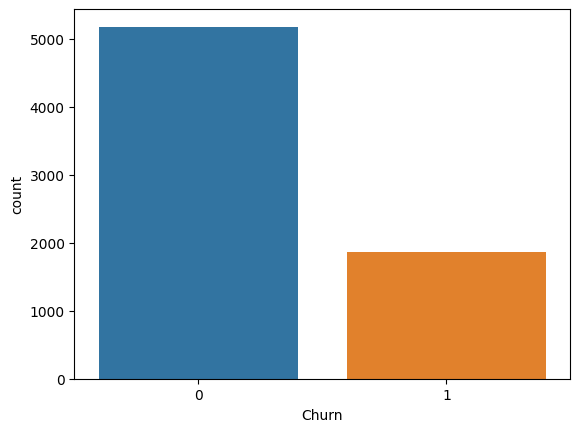

In [24]:
sns.countplot(x='Churn', data=df)
plt.show()

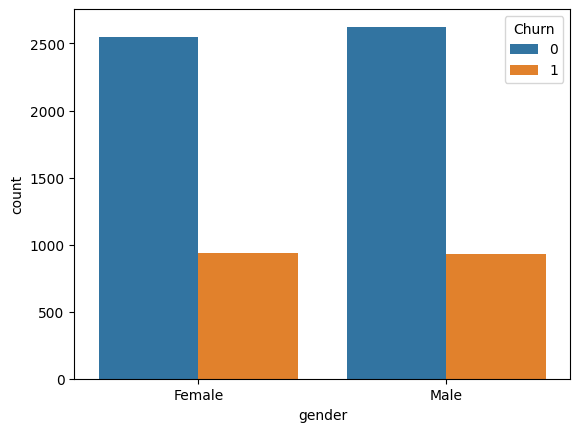

In [25]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

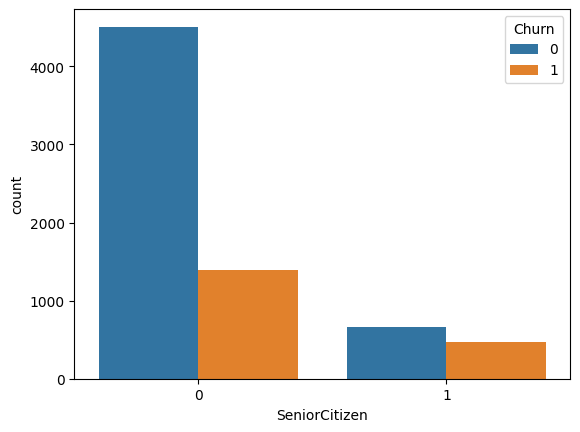

In [26]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()

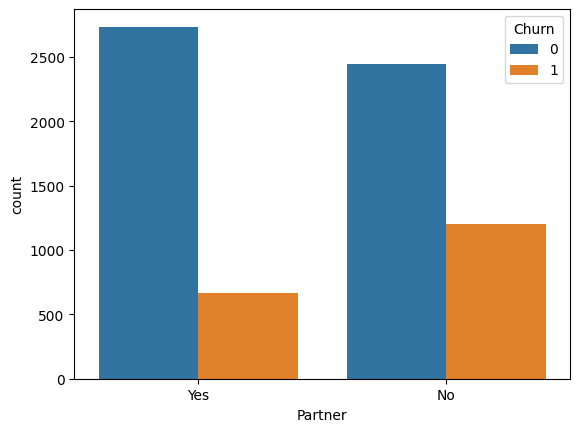

In [27]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()

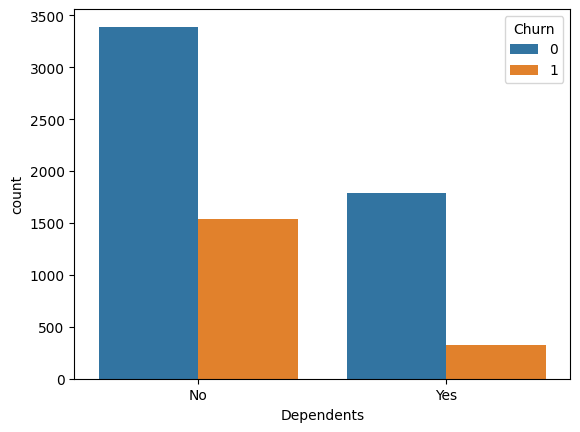

In [28]:
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()

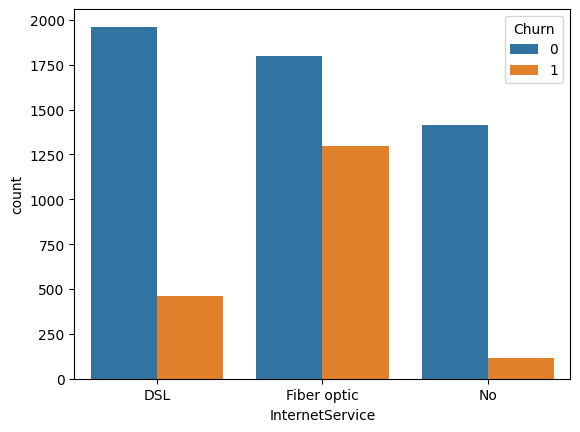

In [29]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

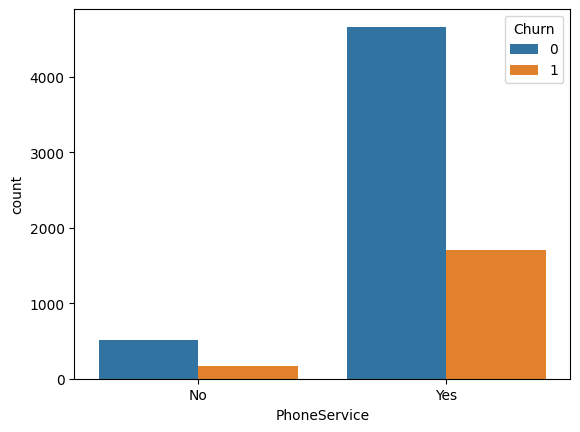

In [30]:
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.show()

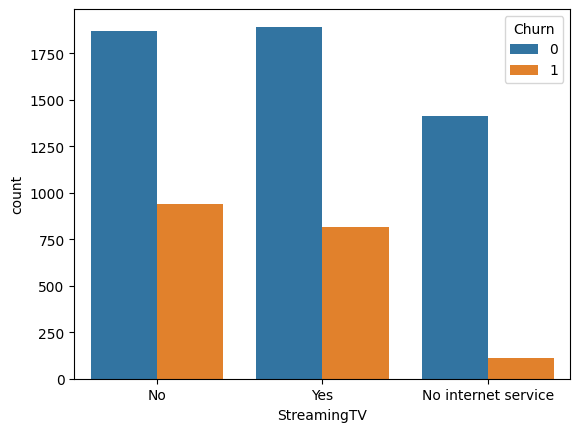

In [31]:
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.show()

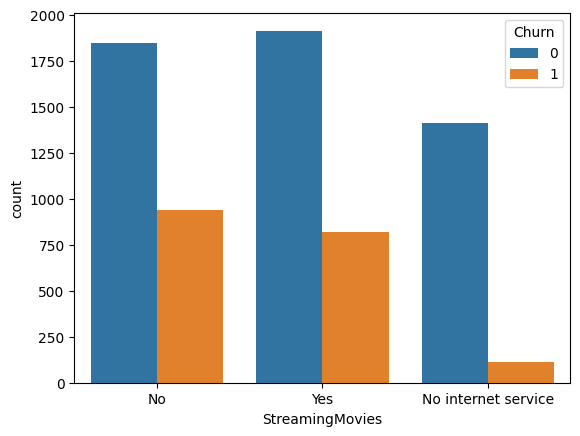

In [32]:
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.show()

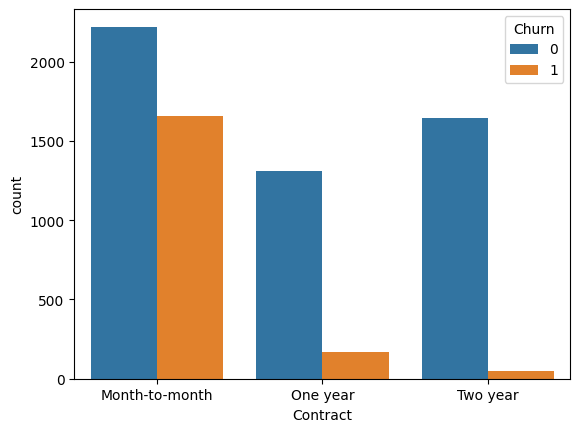

In [33]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

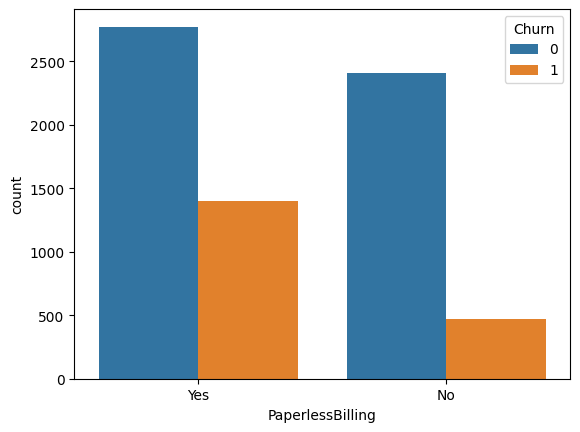

In [34]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.show()

<ipython-input-35-8a81f9e1494f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])


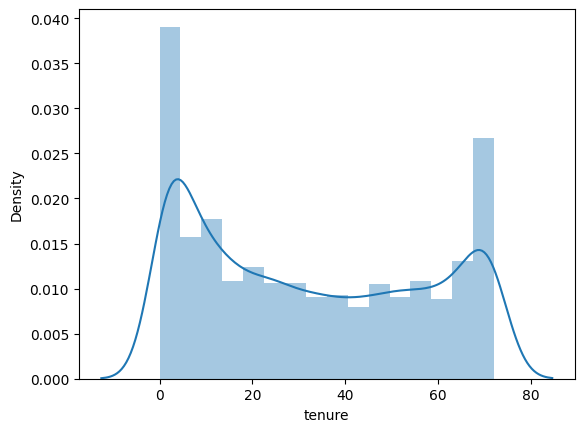

In [35]:
sns.distplot(df['tenure'])
plt.show()

<ipython-input-36-65cf2824d61a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'])


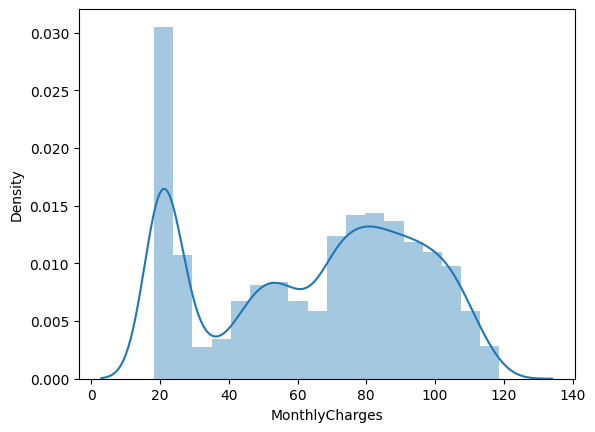

In [36]:
sns.distplot(df['MonthlyCharges'])
plt.show()

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

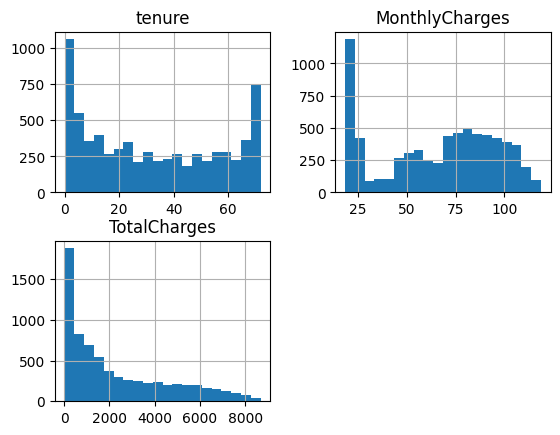

In [37]:
df.hist(column=['tenure', 'MonthlyCharges', 'TotalCharges'], bins=20)

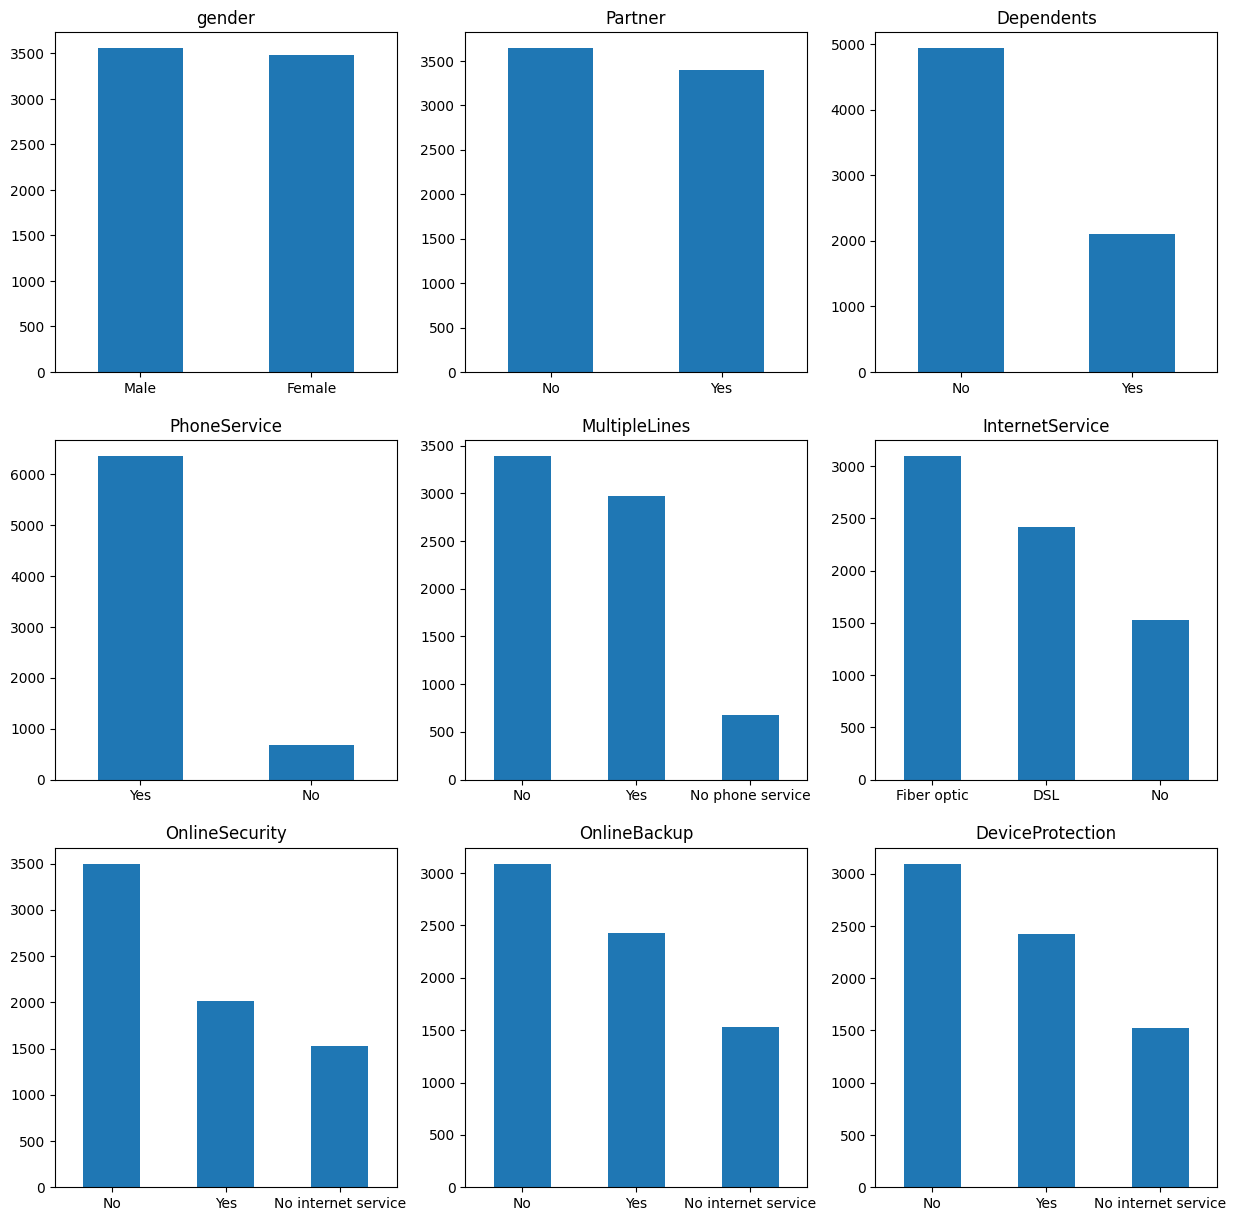

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

for i, col in enumerate(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection']):
    df[col].value_counts().plot(kind='bar', ax=axs[i], rot=0)
    axs[i].set_title(col)

<Axes: >

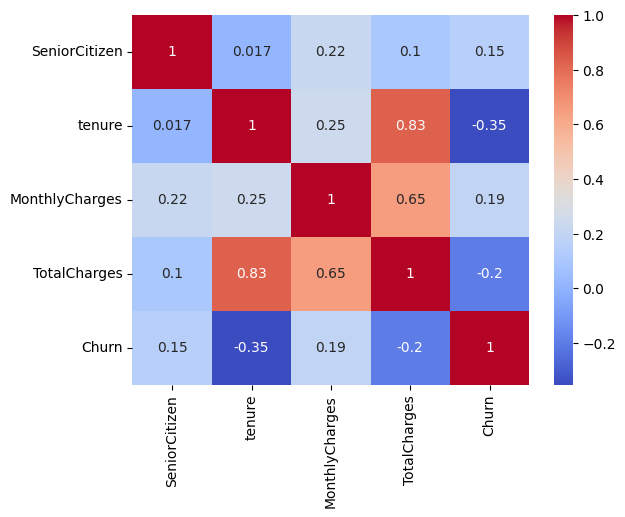

In [39]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Churn', ylabel='tenure'>

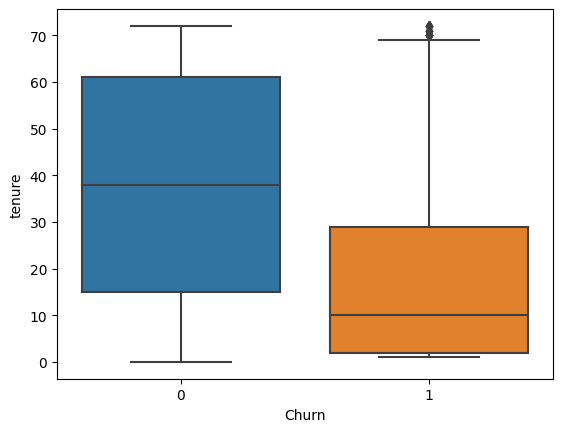

In [40]:
sns.boxplot(x='Churn', y='tenure', data=df)

<Axes: xlabel='tenure', ylabel='TotalCharges'>

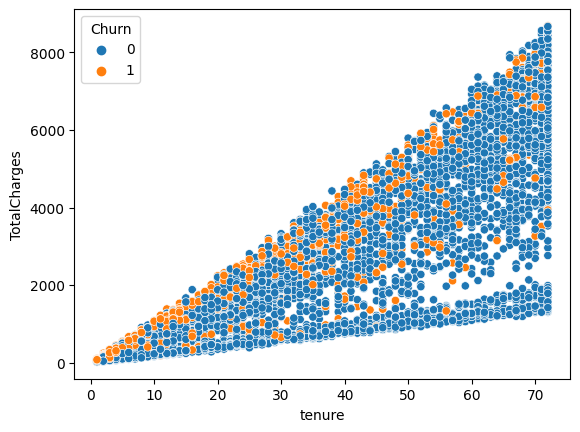

In [41]:
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)

<ipython-input-42-28d04b32ce35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'].dropna())


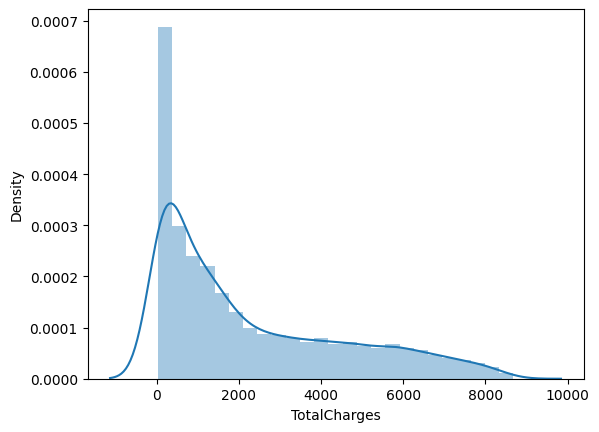

In [42]:
sns.distplot(df['TotalCharges'].dropna())
plt.show()

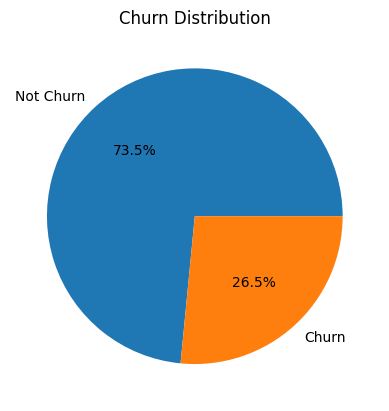

In [43]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

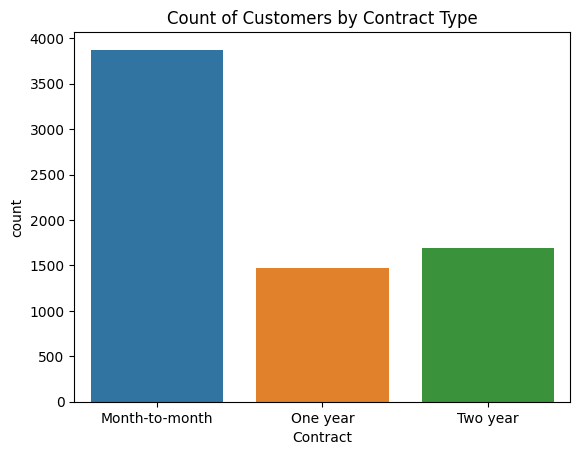

In [58]:
sns.countplot(x='Contract', data=df)
plt.title('Count of Customers by Contract Type')
plt.show()

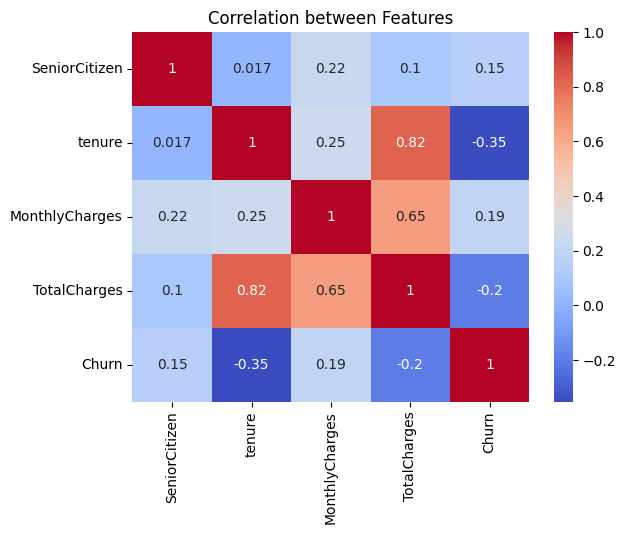

In [59]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

# Perform outliers detection and imputation

In [44]:
q1, q3 = np.percentile(df['TotalCharges'].dropna(), [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [45]:
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df['TotalCharges'].values.reshape(-1, 1))

#preprocess the dataset

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#Train the model

In [49]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [50]:
#print the model performance
print('Logistic Regression:')
print('Accuracy:', lr_accuracy)
print('Precision:', lr_precision)
print('Recall:', lr_recall)

Logistic Regression:
Accuracy: 0.815471965933286
Precision: 0.677115987460815
Recall: 0.579088471849866


In [51]:
# decesion tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)

In [52]:
#print the model performance
print('Decision Tree:')
print('Accuracy:', dt_accuracy)
print('Precision:', dt_precision)
print('Recall:', dt_recall)

Decision Tree:
Accuracy: 0.794889992902768
Precision: 0.6071428571428571
Recall: 0.6380697050938338


#save the model and scaler
we choose logistic as its accuracy is better compared to decesion tree


In [53]:
import pickle

In [54]:
filename='model.sav'

In [55]:
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [56]:
pickled_model = pickle.load(open('lr_model.pkl','rb'))